# Empalme con la clase anterior
## Mirar la clase 13 para discutir pregunta de Valentina sobre estabilidad
## Mostrar resultado de la Tarea \# 12 de Tatiana.

Eso fisica. Volvamos a lo numerico. Los esquemas numericos pueden sufir tambien de dispersion (numerica). Veamos




# Ecuaciones elipticas

La ecuacion eliptica canonica se llama de **Poisson**

$$\nabla^2 u(x,y) \equiv \frac{\partial^2 u}{\partial x^2 }(x,y) + \frac{\partial^2 u}{\partial y^2}(x,y) = \rho(x,y) $$  

## Formulacion en diferencias finitas
En el intervalo $[a,b] \times [c,d]$
$x_i = x_0 + i \Delta x, y_j=y_0 + j \Delta y$, $x_0=a$, y_0=c, $\Delta x = (b-a)/nx $, $\Delta y = (d-c)/nx$,
$w_{ij}=u(x_i, y_j)$, $\rho_{ij}= \rho(x_i, y_j)$

Usando diferencias finitas centrales tanto en $x$ como en $y$

$$\frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2}
+ \frac{w_{i j+1} - 2 w_{ij} + w_{i j-1}}{\Delta y^2} = \rho_{ij} $$

Las condiciones de bordo son

\begin{eqnarray}
w_{0j} = e_j \quad , \quad j = 0, 1, \cdots, ny \\
w_{nx j} = f_j \quad , \quad j = 0, 1, \cdots, ny \\
w_{i0} = g_i \quad , \quad i = 0, 1, \cdots, nx \\
w_{i ny} = y_i \quad , \quad i = 0, 1, \cdots, nx \\
\tag{6}
\end{eqnarray}

Por supuesto en las esqunas hay doble definicion. Entonces
para evitar inconsitencias

$$e_0 = g_0 , f_{ny} = h_{nx}, g_{nx}=f_0, e_{ny}=h_0 $$

Simplifiquemos (6)

$$w_{i+1 j} - 2 w_{ij} \left ( 1 + \frac{(\Delta x)^2}{(\Delta y)^2} \right ) - w_{i-1 j} + \frac{(\Delta x)^2}{(\Delta y)^2}
(w_{i j+1} + w_{i j-1}) = \Delta x^2 \rho_{ij}$$

Simplifiquemos esta ecuacion un poco mas


$$w_{i+1 j} - 2 w_{ij} (1  + \beta^2) + w_{i-1 j} + \beta^2( w_{i j+1} + w_{i j-1}) = (\Delta x)^2 \rho_{ij} $$
donde $\beta = \Delta x /\Delta y$. Si $\Delta x = \Delta y$ entonces $\beta=1$ y podemos escribir

$$w_{i+1 j} - 4 w_{ij}  + w_{i-1 j} + ( w_{i j+1} + w_{i j-1}) = (\Delta x)^2 \rho_{ij} $$

La molecula se muestra en la figura siguiente

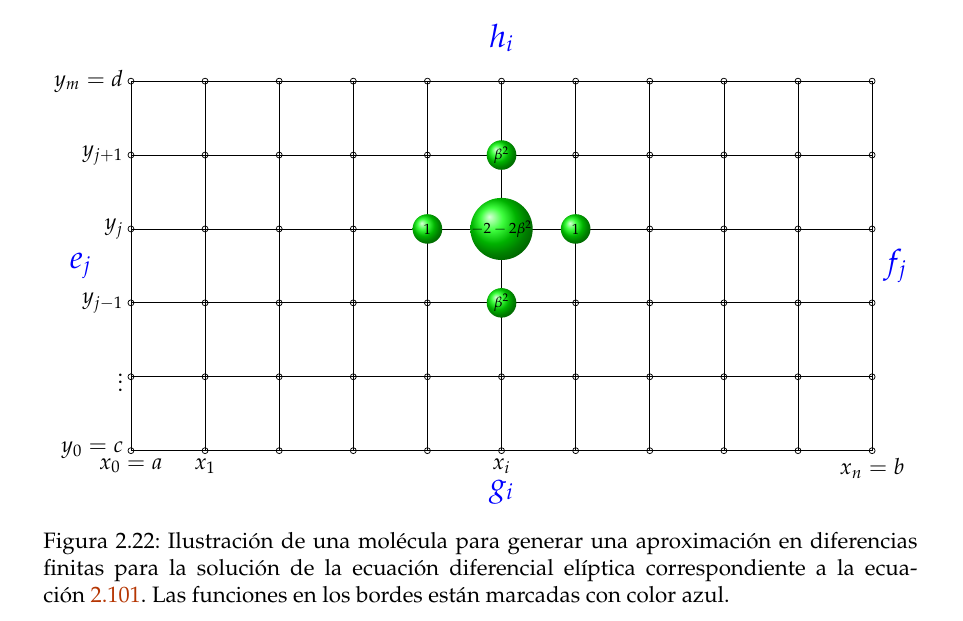

Vamos a haceer el siguiente mapeo de indices. Por que queremos
que el nodo $w_{ij}$ tenga un solo inidice $w_{\ell}$? Esto es lo que en python se llama `flatten`.

El mapeo es el siguiente

\begin{eqnarray}
    11 \mapsto 1 \quad  21 \mapsto 2 \quad \cdots \quad (nx-1)1 \mapsto nx-1 \\
    12 \mapsto nx \quad 22 \mapsto nx+1 \quad \cdots \quad (nx-1)2 \mapsto 2(nx-2) \\
\end{eqnarray}
Al final, en la ultima capa

$$1(ny-1) \mapsto (ny-2)(nx-1) + 1 \quad 2(ny-1) \mapsto (ny-2)(nx-1)+ 2  
\quad \quad  (nx-1)(ny-1)  \quad \quad (nx-1)(ny-1) \mapsto (nx-1)(ny-1)  $$

En general

$$ij \mapsto \ell =(j-1)(nx-1) + i \quad 1 \le i \le nx-1 \quad , 1 \le j \le ny - 1$$








La idea es construir un sistema de la forma $A w = b$

$$g_1 \beta^2 + e_1 -2(1 + \beta^2) w_1 + w_2 + 0 w_3 + \cdots + 0 w_{nx-1} \beta^2 w_{nx} + 0 w_{nx+1} + \cdots + 0 w_{(nx-1)(ny-1)} = \Delta x^2 \rho_1  $$

Pasando a restar al otro lado los terminos de la frontera.
$$ -2(1 + \beta^2) w_1 + w_2 + 0 w_3 + \cdots + 0 w_{nx-1} \beta^2 w_{nx} + 0 w_{nx+1} + \cdots + 0 w_{(nx-1)(ny-1)} = \Delta x^2 \rho_1 - g_1 \beta^2 - e_1 $$

Ahora para la segunda celda de la primera fila

$$g_2 \beta^2 + w_1 - 2(1 + \beta^2) w_2 + w_3 + 0 w_4 + \cdots + w_{nx} + \beta^2 w_{nx+1} + 0 w_{nx +2} + \cdots 0 w_{(nx-1)(ny-1)} = \Delta x^2 \rho_2 $$

Pasando el termino de la frontera inferior a la derecha.

$$w_1 - 2(1 + \beta^2) w_2 + w_3 + 0 w_4 + \cdots + w_{nx} + \beta^2 w_{nx+1} + 0 w_{nx +2} + \cdots 0 w_{(nx-1)(ny-1)} = \Delta x^2 \rho_2 - g_2 \beta^2 $$

Avancemos hasta el penultimo de la primera fila.

$$\beta^2 g_{nx-2} + 0 w_1 + \cdots + - w_{nx-4} + w_{nx-3} - 2(1 + \beta^2) w_{nx-2} + w_{nx-1} + 0 w_{nx} + \cdots + - w_{2 nx-4} + \beta^2 w_{2 nx-3} + 0 w_{nx-2} + \cdots 0 w_{(nx-1)(ny-1)} = \rho_{nx-2} \Delta x^2  $$


Pasando el termino de la frontera inferior a la derecha.

$$0 w_1 + \cdots + - w_{nx-4} + w_{nx-3} - 2(1 + \beta^2) w_{nx-2} + w_{nx-1} + 0 w_{nx} + \cdots + - w_{2 nx-4} + \beta^2 w_{2 nx-3} + 0 w_{nx-2} + \cdots 0 w_{(nx-1)(ny-1)} = \rho_{nx-2} \Delta x^2 -\beta^2 g_{nx-2}  $$

Pasamos al ultimo nodo (interno) de la derecha


$$\beta^2 g_{nx-1} + 0 w_1 + \cdots + 0 w_{nx-3} + w_{nx-2} - 2(1 + \beta^2) w_{nx-1} + f_1 + \beta^2 w_{2 nx -3}  = \Delta x^2 \rho_{nx-1} $$

Pasamos los dos terminos de la frontera a la derecha

$$ + 0 w_1 + \cdots + 0 w_{nx-3} + w_{nx-2} - 2(1 + \beta^2) w_{nx-1} + \beta^2 w_{2 nx -3}  = \Delta x^2 \rho_{nx-1} - \beta^2 g_{nx-1} - f_1 $$


El primero de la segunda fila

$$\beta^2 w_1 + e_2- 2(1 + \beta^2) w_{nx} + w_{nx+1} + \beta^2 w_{2 nx} = \rho_{nx} \Delta x^2 $$

Pasando el termino de la frontera a la derecha

$$\beta^2 w_1 - 2(1 + \beta^2) w_{nx} + w_{nx+1} + \beta^2 w_{2 nx} = \rho_{nx} \Delta x^2 - e_2 $$


Segunda celda de la segunda fila

$$\beta^2 w_2 + w_n - 2 ( 1 + \beta^2) w_{nx+1} + \beta^2 w_{2 nx} = \rho_{nx+1} \Delta x^2 = \rho_{(ny-1)(nx-1)} \Delta x^2 - \beta^2 h_{nx-1} - f_{ny-1}  $$

Vamos al final de todos

$$\beta^2 w_{(ny-2)(nx-1)} + w_{(ny-1)(nx-1)-1} - 2(1 + \beta^2) w_{(ny-1)(nx-1)} = \rho_{(ny-1)(nx-1)} \Delta x^2 - \beta^2 h_{nx-1} - f_{ny-1}. $$

El resultado es $A w = b$ donde $A$ es la matriz a continuacion

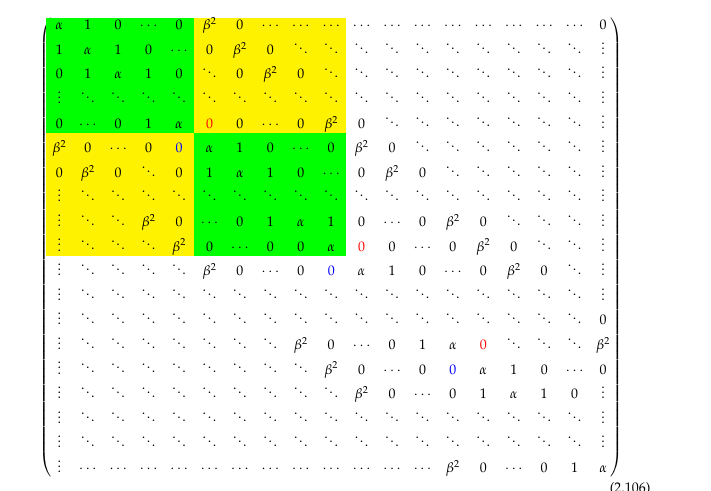

Esta matriz tiene un patron. Como se muestra en la siguiente figura.


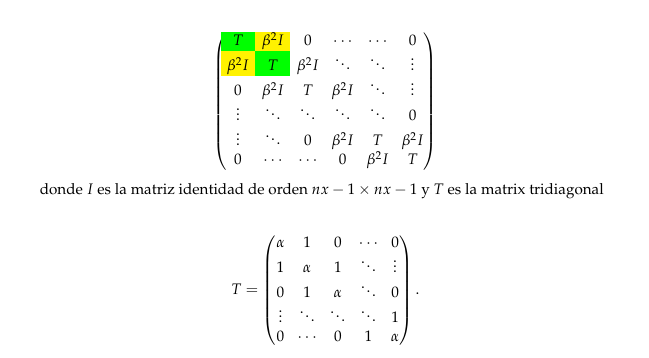

Esto se puede entender con la proxima figura

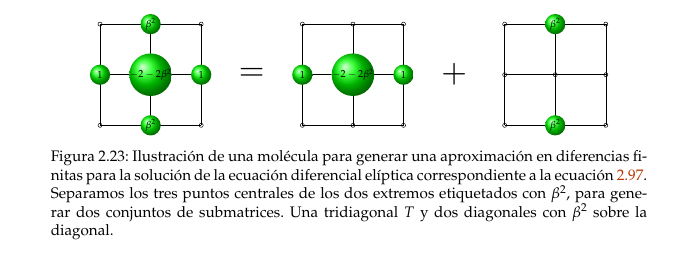

El vector $b$ es como sigue

$$ b_{\ell} = \Delta x^2 \rho_{\ell} - c_\ell $$
donde
$$ c_\ell = (e_1 + g_1 \beta^2), g_2 \beta^2 , \cdots, g_{nx-2} \beta^2 , g_{nx-1} \beta^2 + f_1, e_2, 0, \cdots , 0 , f_2, e_3, 0 , \cdots,   0 f_3, \cdots, \cdots, e_{nx_2}, 0 \cdots, 0, f_{nx-2},  e_{ny-1} + h_1 \beta^2, h_2 \beta^2 , \cdots , h_{nx-2} \beta^2 , h_{nx-1}\beta^2 + f_{ny-1})$$

$c_\ell$ es un vector columna que aca lo pongo fila por conveniencia. Cada coma "," separa una comonente. La primera componentes es $c_1$ , la segunda $c_2$ y asi sucesivamente.

El sistema para resolver es $Aw = b$.

Nos vamos a enfocar en algunos casos simples.

* Caso 1: Una sola celda interior. $w_{11}$.
     Como se dibujo en el tablero
     
     $$-2(1 + \beta^2) w_{11} =\Delta x^2 \rho_1 - e_1 - f_1 - g_1 \beta^2 - h_1 \beta^2.$$
     
     Este, por pequenho se puede resolver a mano.
     
     $$w_{11} = \frac{e_1 + f_1  +  \beta^2(g_1 + h_1)}{2(1 + \beta^2)}-\frac{\Delta x^2 \rho_1}{2(1 + \beta^2)} $$
     
     Los siguientes puntos son interesantes

    1. Si $\rho_1 = 0$ entonces $w_{11}$ es un promedio ponderado de los valores en la frontera.  Si $\Delta=\Delta y$ entonces $\beta=\Delta x/\Delta y$ es 1 y tenemos

    $$w_{11} = \frac{e_1 + f_1 + g_1 + h_1}{4} $$
    Que es una media aritmetica. En este sentido la solucion a la ecuacion de Laplace es un "suavizador".

* Caso 2: $nx=1$ (interior) y $ny>1$

$$-2(1 + \beta^2) w_{11} + \beta^2 w_{12} = \Delta x^2 \rho_1 - g_1 \beta^2 - e_1 - f_1 $$

$$\beta w_{11}^2 - 2(1 + \beta^2) w_{12} + \beta^2 w_{13} = \Delta x^2 \rho_2 - e_2 f_2  $$
$$ \vdots $$

La penultima fila es

$$\beta^2 w_{1 ny-3} - 2 (1 + \beta^2) w_{1 ny-2} + \beta^2 w_{ny-1} = \Delta x^2 \rho_{ny-2} - e_{ny-2} - f_{ny-2}. $$

La ultima fila
$$\beta^2 w_{1 ny-2} - 2(1 + \beta^2) w_{1 ny-1} = \Delta x^2 \rho_{ny-1} - e_{ny-1} - f_{ny-1} - h_1 \beta^2 $$

La matriz de este sistema es:


\begin{eqnarray}
\begin{pmatrix}
-2(1 + \beta^2) & \beta^2 & 0 & \cdots & \cdots & 0 \\
\beta^2 & -2(1 + \beta^2) & \beta^2 & 0 & \cdots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots & \vdots  \\
\vdots &  \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots &  \ddots & \ddots & \ddots & \ddots & \beta^2 \\
0 & \cdots & \cdots &0 & \beta^2 & -2(1 + \beta^2)
\end{pmatrix}
\end{eqnarray}

El vector de la derecha es

$$\Delta x^2 \rho_1 - c_i $$
donde

$$c_1 = - g_1 \beta^2 - e_1 - f_1  $$
$$c_2 = -e_2 - f_2 $$
&& \vdots &&
$$ c_{n-2} = -e_{n-2} - f_{n-2} $$
$$ c_{n-1} = -e_{n-1} - f_{n-1} - h_1 \beta^2 $$

* Otro caso: $ny=2$, $nx=3$


$$-2(1+\beta^2) w_1 + w_2 + \beta^2 w_3 = \Delta x^2 \rho_1 - e_2 - \beta^2 g_1  $$

$$w_1 - 2(1 + \beta^2) w_2 + \beta^2 w_4 = \Delta x^2 \rho_2 - f_1 - \beta^2 g_2  $$

$$\beta^2 w_1 - 2 ( 1 + \beta^2) w_3 + w_4 = \Delta x^2 \rho_3 - e_2 - \beta^2 h_1 $$

El ultimo
$$\beta^2 w_2 + w_3 - 2(1 + \beta^2) w_4 = \Delta x^2 \rho_4 - f_2 - \beta^2 h_2 $$

Se puede observar claramente que la matriz es

$$A = \begin{pmatrix} -2(1 + \beta^2) & 1 & \beta^2 & 0 \\
1  & -2(1 + \beta^2) & 0 & \beta^2 \\
\beta^2 & 0 & -2(1 + \beta^2) & 1 \\
0  & \beta^2 & 1 & -2(1 + \beta^2)  \end{pmatrix} $$

El vector $b$ esta dado por $b_i=\Delta x^2 \rho_i + c_i$
donde

$$c_1 = -e_1 - \beta^2 g_1  $$
$$c_2 = -f_1 - \beta^2 g_2  $$
$$c_3 = -e_2 - \beta^2 h_1  $$
$$c_4 = -f_2 - \beta^2 h_2  $$

De nuevo la matriz $A$ se pude escribir como

$$A = \begin{pmatrix} B & \beta^2 I \\ \beta^2 I & B\end{pmatrix} $$

Donde

$$B = \begin{pmatrix} \alpha & 1 \\ 1 & \alpha  \end{pmatrix}  $$
con
$$\alpha = -2(1 + \beta^2) $$

* Ultimo caso $ny>3$
$$-2(1+\beta)^2 w_1 + w_2 + \beta^2 w_3 = \Delta x^2 \rho_1 - e_1 - \beta^2 g_1  $$

$$w_1 - 2(1 + \beta^2) w_2 + \beta^2 w_4 = \Delta x^2 \rho_2 - f_1 - \beta^2 g_2  $$

Segunda fila izquierda

$$\beta^2 w_1 - 2(1+ \beta^2) w_3 + w_4 + \beta^2 w_5 = \Delta x^2 \rho_3 - e_2 $$

Segunda fila derecha
$$\beta^2 + w_3 - 2( 1 + \beta^2) w_4 + \beta^2 w_6 = \Delta x^2 \rho_4 - f_2 $$

Penultimo izquierdo
$$\beta^2 w_{2 ny -6} + w_{2ny-5} - 2(1 + \beta^2) w_{2ny-2} = \Delta x^2 \rho_{2 ny-4} - f_{ny-2} $$

Penultimo derecho

$$\beta^2 w_{2 ny-5} - 2(1 + \beta^2) w_{2 ny-3} + w-{2ny-2} = \Delta x^2 \rho{2 ny-3} - e_{ny-1} - \beta^2  $$

Me enrede.....muestro la matriz





La matriz $A$ es


$$A = \begin{pmatrix}
\alpha & 1 & \beta^2 & 0 & \cdots & \cdots & \cdots & \cdots &  \cdots & & 0 \\
1 & \alpha & 0 & \beta^2 & 0 & \cdots & \cdots & \cdots &
\cdots & \cdots &  \vdots  \\
\beta^2 & 0 & \alpha & 1 & \beta^2 & 0 & \cdots & \cdots & \cdots & \cdots & \vdots  \\
\vdots  & \vdots & \vdots & \cdots & \cdots & \cdots & \ddots & \ddots & \ddots & \ddots & \vdots    \\
\vdots  & \vdots & \vdots & \cdots & \cdots & \cdots & \ddots & \ddots & \ddots & \ddots & 0   \\
\vdots & \cdots & \cdots & \cdots & \cdots &  0 & \beta^2 & 1 & \alpha & 0 & \beta^2 \\
\vdots & \cdots & \cdots & \cdots & \cdots & \cdots & 0 & \beta^2 & 0 & \alpha & 1  \\
0 & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & 0 & \beta^2 & 1 & \alpha
\end{pmatrix} $$

Ver las notas de clase pagina 211 para el vector $b$ y la forma
simplificada de esta matriz.